# Assignment 2 (K mean+ Aglomerative + Purity + DBSCAN)


## Assignment instructions

1. Carefully read and follow all instructions.
2. No Late submisison Would be Accepted
3. You can search the basics of python, concepts, and syntax online. Copy solution from internet would result into 0.
4. Do keep in mind that sharing the code, discussing it is highly unethical, and all actions would be considered as plagiarism.
5. Plagiarism will result in serious penalty
6. I'll eveluate on the basis of resultant as you guys are using built in functions. 
7. keep code clean and precise, its part of your assignment grading. Doing a hectic code would result in -ve marking

###### Instruction - rename this file as rollnumber_ass2; for example
###### 20l-1212_ass2

In [572]:
# import necessory libraries
import time
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_moons,make_circles,make_regression
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster.hierarchy import fcluster, linkage,dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
np.random.seed(0)
col=['green','orange','brown','red','magenta','violet','blue','pink'] # defining colors for use in graphs


# Task1: 
You need to create blobs with onlt 2 dimentions. 

Number of nodes equal to your roll number

#### eg: 20l-1212= 1212 nodes

All of you understood the code of blob and circle that have been demonstrated in labs 

Manipulate the value in that code and regenerate 5 datasets, such those datsets are near approximation of below images

## NOTE : The outputs fields are also shared.

##### Dataset 1
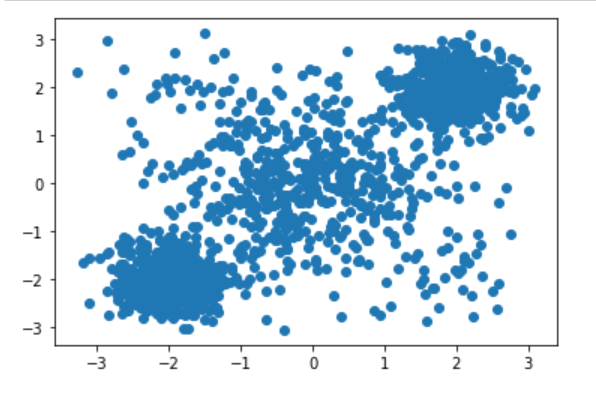

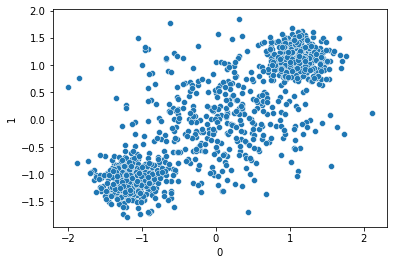

In [573]:
temp=make_blobs(n_samples=1113,centers=[(-5,-5),(0,0),(5,5)],cluster_std=[1,3,1], n_features=2,random_state=None)
data1=pd.DataFrame(temp[0],columns=[0,1])
data1['output']=temp[1]
data1=pd.DataFrame(StandardScaler().fit_transform(data1))
sns.scatterplot(data=data1,x=0,y=1);

##### Dataset 2
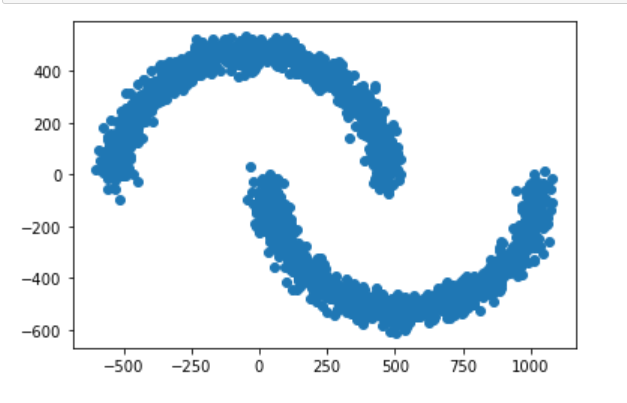

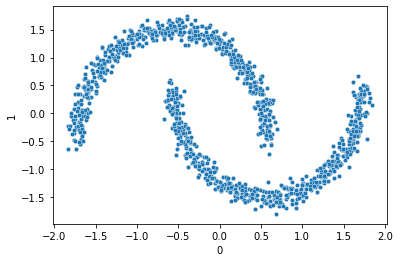

In [574]:
# creating a moon of dataset_2
temp = make_moons(n_samples=1113, noise=0.05)
data2=pd.DataFrame(temp[0],columns=[0,1])
data2['output']=temp[1]
data2=pd.DataFrame(StandardScaler().fit_transform(data2))
sns.scatterplot(data=data2,x=0,y=1,s=20);

##### Dataset 3
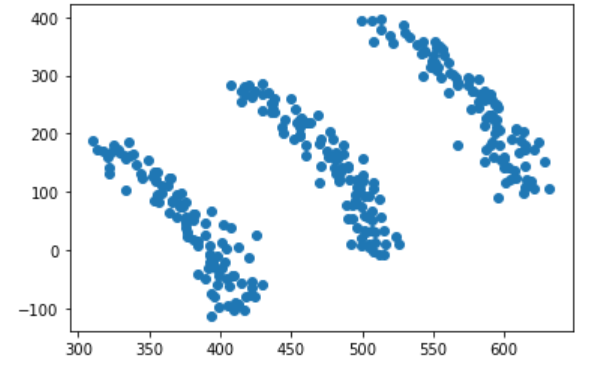

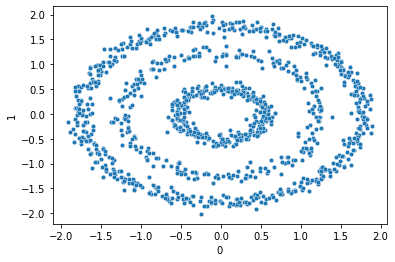

In [575]:
data3,y1 = make_circles(n_samples=500, factor=0.7, noise=0.04)
data3_t,y2=make_circles(n_samples=613, factor=0.3, noise=0.04)
data3 = pd.DataFrame(np.vstack([data3,data3_t]),columns=[0,1])
y2[y2==1]=2
data3['output'] = np.hstack([y1,y2])
data3=pd.DataFrame(StandardScaler().fit_transform(data3))
sns.scatterplot(data=data3,x=0,y=1,s=20);

##### Dataset 4
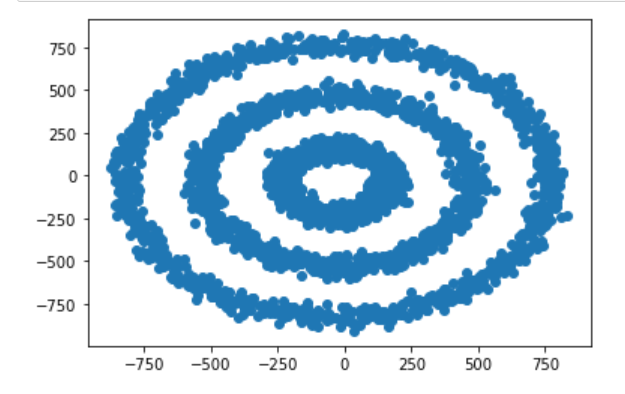

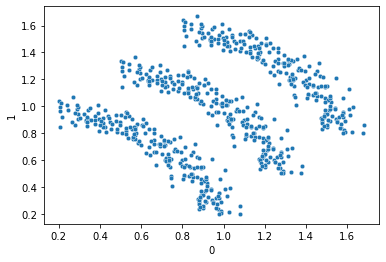

In [576]:
temp,x =make_circles(n_samples=1113, noise=0.05,factor=0.99)
temp=temp[(temp[:,0]>.2) & (temp[:,1]>.2)]
temp=np.c_[np.r_[temp,temp+.3,temp+.6],np.r_[temp*0,temp*0+1,temp*0+2]]
data4=pd.DataFrame(temp)
sns.scatterplot(data=data4,x=0,y=1,s=20);

##### Dataset 5
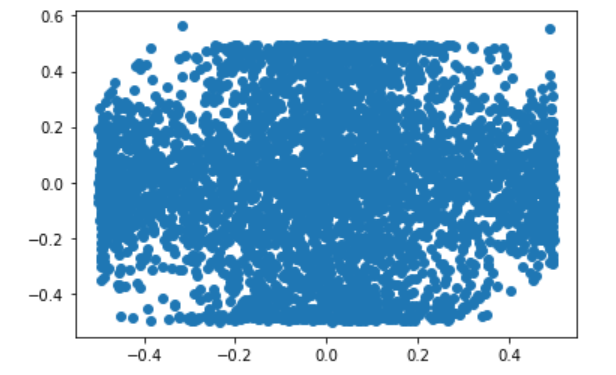

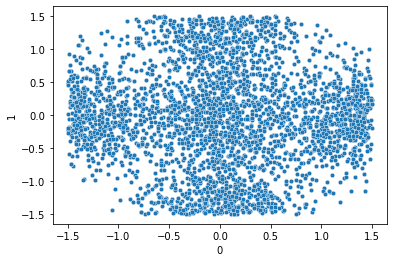

In [577]:
temp,x=make_blobs(n_samples=5000,centers=[[1,0],[-1,0],[0,-1],[0,1],[0,0]],cluster_std=0.3)
data5=pd.DataFrame(temp)
data5['output']=x
data5=pd.DataFrame(StandardScaler().fit_transform(data5))
data5=data5.loc[(data5[0]>-1.5) & (data5[1]>-1.5)]
data5=data5.loc[(data5[0]<1.5) & (data5[1]<1.5)]
sns.scatterplot(data=data5,x=0,y=1,s=20);

# Task2 (Time+ Purity + Plot):
Nice work! Pat on you shoulder

#### Part(A)

Now lets use all of learnt functions from previous labs and apply each and every one of them on these 5 datsets.

1. Kmean
2. Aglomerative (single linkage)
3. Aglomerative (Avg linkage)
4. Aglomerative (Complete linkage)
5. Dbscan

You also need to print purity at the end of each plot & don't forget to report the time it takes by each algo in each

After each output state your conclusive sentence about it



### Note: There are total 25 outputs, each with 2 fields (time & purity). Displaying output with default colors would results in 0 for that section

In [578]:
# defiing purity function
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

The time of plot is 0.1033s
The purity score is 0.9910
0       0.000000
1      -1.224745
2      -1.224745
3       1.224745
4      -1.224745
          ...   
1108    1.224745
1109   -1.224745
1110   -1.224745
1111   -1.224745
1112   -1.224745
Name: 2, Length: 1113, dtype: float64
[2 1 1 ... 1 1 1]
K-means is a good technique for this data as purity is relatively high.


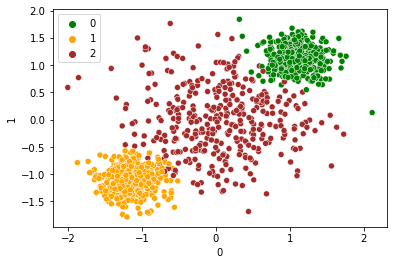

In [586]:
# K mean - case 1
# Code which output time, purity, distiniugable plot 
#conclusive line
data=data1
n_clust=3
wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
#     kmeans.fit(data)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss);
t0=time.time()
kmeans = KMeans(n_clusters=n_clust)
kmeans.fit(data)
temp=kmeans.labels_
sns.scatterplot(data=data,x=0,y=1,hue=temp,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4fs" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("K-means is a good technique for this data as purity is relatively high.")

The time of plot is 0.0704s
The purity score is 1.0000
K-means is a very good technique for this data as purity is perfect.


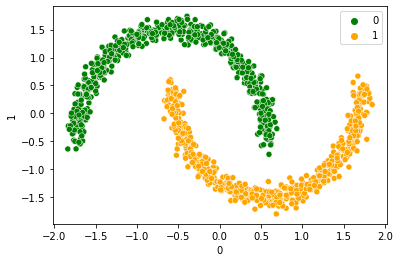

In [ ]:
# K mean - case 2
# Code which output time, purity, distiniugable plot 
#conclusive line
data=data2
n_clust=2
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
#     kmeans.fit(data)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss);
t0=time.time()
kmeans = KMeans(n_clusters=n_clust)
kmeans.fit(data)
temp=kmeans.labels_
sns.scatterplot(data=data,x=0,y=1,hue=temp,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4fs" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("K-means is a very good technique for this data as purity is perfect.")

The time of plot is 0.1006s
The purity score is 0.7754
K-means is a good technique for this data as purity is relatively high.


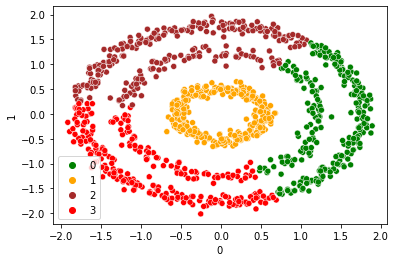

In [ ]:
# K mean - case 3
# Code which output  time, purity, distiniugable plot 
#conclusive line
data=data3
n_clust=4
wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
#     kmeans.fit(data)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss);
t0=time.time()
kmeans = KMeans(n_clusters=n_clust)
kmeans.fit(data)
temp=kmeans.labels_
sns.scatterplot(data=data,x=0,y=1,hue=temp,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4fs" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("K-means is a good technique for this data as purity is relatively high.")

The time of plot is 0.0657
The purity score is 1.0000
K-means is a very good technique for this data as purity is perfect.


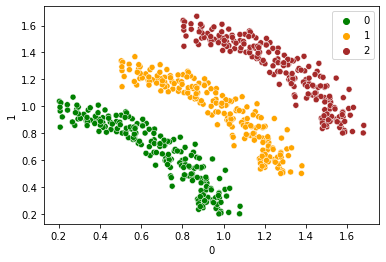

In [ ]:
# K mean - case 4
# Code which output time, purity, distiniugable plot 
#conclusive line
data=data4
n_clust=3
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
#     kmeans.fit(data)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss);
t0=time.time()
kmeans = KMeans(n_clusters=n_clust)
kmeans.fit(data)
temp=kmeans.labels_
sns.scatterplot(data=data,x=0,y=1,hue=temp,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4f" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("K-means is a very good technique for this data as purity is perfect.")

The time of plot is 0.1187s
The purity score is 0.9827
K-means is a good technique for this data as purity is relatively high.


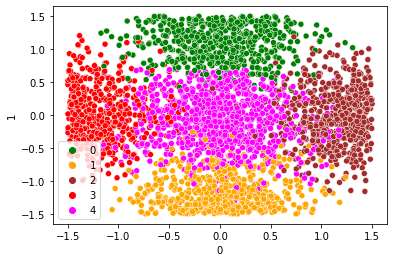

In [ ]:
# K mean - case 5
# Code which output time, purity, distiniugable plot 
#conclusive line
data=data5
n_clust=5
# wcss = []
# # for i in range(1, 11):
# #     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
# #     kmeans.fit(data)
# #     wcss.append(kmeans.inertia_)
# # plt.plot(range(1, 11), wcss);
t0=time.time()
kmeans = KMeans(n_clusters=n_clust)
kmeans.fit(data)
temp=kmeans.labels_
sns.scatterplot(data=data,x=0,y=1,hue=temp,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4fs" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("K-means is a good technique for this data as purity is relatively high.")

The time of plot is 0.0900s
The purity score is 0.3342
Single Agglomerative clustering is not a good technique for this data as purity is quite low.


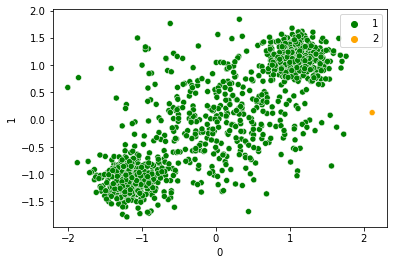

In [ ]:
# Aglomerative 1 - case 1
# Code which output time, purity, distinguishable plot 
#conclusive line
data=data1
n_clust=2
# Dendrogram = dendrogram((linkage(data, method ='single')))
# plt.axhline(y=1.3, c='grey', lw=1, linestyle='dashed');
t0=time.time()
distance_matrix = linkage(data[[0,1]], method='single', metric='euclidean')
temp = fcluster(distance_matrix, n_clust, criterion='maxclust')
sns.scatterplot(x=0, y=1, hue=temp, data=data,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4fs" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("Single Agglomerative clustering is not a good technique for this data as purity is quite low.")

The time of plot is 0.0640s
The purity score is 1.0000
Single Agglomerative clustering is a very good technique for this data as purity is perfect.


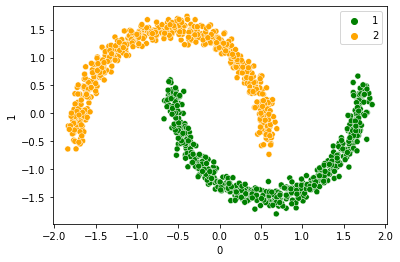

In [ ]:
# Aglomerative 1 - case 2
# Code whihc ourput time, purity, distinguishable plot 
#conclusive line
data=data2
n_clust=2
# Dendrogram = shc.dendrogram((shc.linkage(data, method ='single')))
# plt.axhline(y=0.3, c='grey', lw=1, linestyle='dashed');
t0=time.time()
distance_matrix = linkage(data[[0,1]], method='single', metric='euclidean')
temp = fcluster(distance_matrix, n_clust, criterion='maxclust')
sns.scatterplot(x=0, y=1, hue=temp, data=data,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4fs" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("Single Agglomerative clustering is a very good technique for this data as purity is perfect.")

The time of plot is 0.0657s
The purity score is 1.0000
Single Agglomerative clustering is a very good technique for this data as purity is perfect.


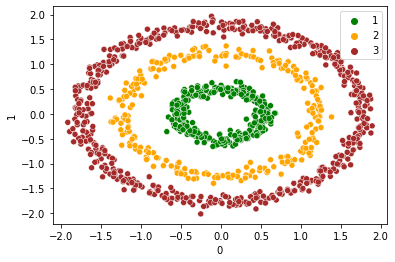

In [ ]:
# Aglomerative 1 - case 3
# Code whihc ourput time, purity, distinguishable plot 
#conclusive line
data=data3
n_clust=3
# Dendrogram = shc.dendrogram((shc.linkage(data, method ='single')))
# plt.axhline(y=0.3, c='grey', lw=1, linestyle='dashed');
t0=time.time()
distance_matrix = linkage(data[[0,1]], method='single', metric='euclidean')
temp = fcluster(distance_matrix, n_clust, criterion='maxclust')
sns.scatterplot(x=0, y=1, hue=temp, data=data,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4fs" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("Single Agglomerative clustering is a very good technique for this data as purity is perfect.")

The time of plot is 0.0553s
The purity score is 1.0000
Single Agglomerative clustering is a very good technique for this data as purity is perfect.


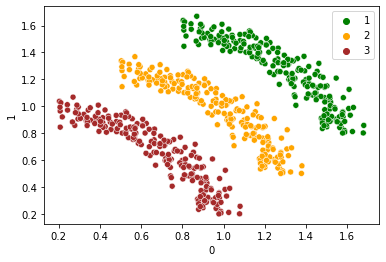

In [ ]:
# Aglomerative 1 - case 4
# Code whihc ourput time, purity, distinguishable plot 
#conclusive line
data=data4
n_clust=3
# Dendrogram = dendrogram((linkage(data, method ='single')))
# plt.axhline(y=1.3, c='grey', lw=1, linestyle='dashed');
t0=time.time()
distance_matrix = linkage(data[[0,1]], method='single', metric='euclidean')
temp = fcluster(distance_matrix, n_clust, criterion='maxclust')
sns.scatterplot(x=0, y=1, hue=temp, data=data,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4fs" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("Single Agglomerative clustering is a very good technique for this data as purity is perfect.")

The time of plot is 0.1502s
The purity score is 0.3100
Single Agglomerative clustering is not a good technique for this data as purity is quite low.


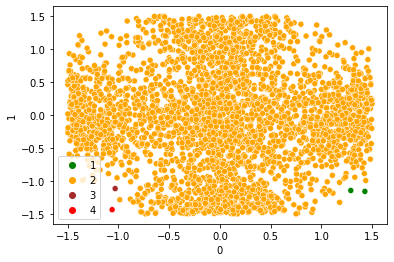

In [ ]:
# Aglomerative 1 - case 5
# Code whihc ourput time, purity, distinguishable plot 
#conclusive line
data=data5
n_clust=4
# Dendrogram = dendrogram((linkage(data, method ='single')))
# plt.axhline(y=1.3, c='grey', lw=1, linestyle='dashed');
t0=time.time()
distance_matrix = linkage(data[[0,1]], method='single', metric='euclidean')
temp = fcluster(distance_matrix, n_clust, criterion='maxclust')
sns.scatterplot(x=0, y=1, hue=temp, data=data,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4fs" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("Single Agglomerative clustering is not a good technique for this data as purity is quite low.")

The time of plot is 0.1823s
The purity score is 0.9704
Average Agglomerative clustering is a good technique for this data as purity is quite high.


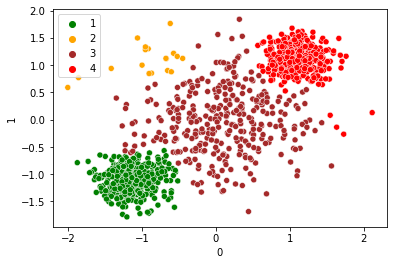

In [ ]:
# Aglomerative 2 - case 1
# Code which output time, purity, distinguishable plot 
#conclusive line
data=data1
n_clust=4
# Dendrogram = dendrogram((linkage(data, method ='average')))
# plt.axhline(y=2.0, c='grey', lw=1, linestyle='dashed');
t0=time.time()
distance_matrix = linkage(data[[0,1]], method='average', metric='euclidean')
temp = fcluster(distance_matrix, n_clust, criterion='maxclust')
sns.scatterplot(x=0, y=1, hue=temp
, data=data,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4fs" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("Average Agglomerative clustering is a good technique for this data as purity is quite high.")

The time of plot is 0.0734s
The purity score is 0.8661
Average Agglomerative clustering is a good technique for this data as purity is quite high.


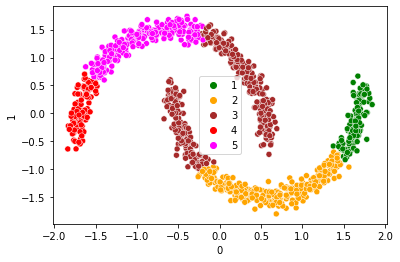

In [ ]:
# Aglomerative 2 - case 2
# Code which output time, purity, distinguishable plot 
#conclusive line
data=data2
n_clust=5
# Dendrogram = shc.dendrogram((shc.linkage(data, method ='average')))
# plt.axhline(y=1.3, c='grey', lw=1, linestyle='dashed');
t0=time.time()
distance_matrix = linkage(data[[0,1]], method='average', metric='euclidean')
temp = fcluster(distance_matrix, n_clust, criterion='maxclust')
sns.scatterplot(x=0, y=1, hue=temp, data=data,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4fs" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("Average Agglomerative clustering is a good technique for this data as purity is quite high.")

The time of plot is 0.0762s
The purity score is 0.6954
Average Agglomerative clustering can be a good technique for this data as purity is medium.


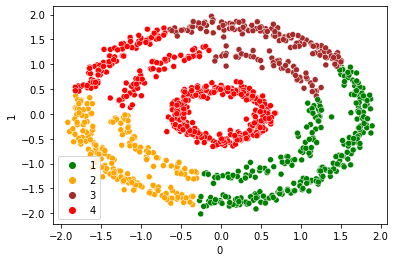

In [ ]:
# Aglomerative 2 - case 3
# Code which output time, purity, distinguishable plot 
#conclusive line
data=data3
n_clust=4
# Dendrogram = shc.dendrogram((shc.linkage(data, method ='average')))
# plt.axhline(y=1.2, c='grey', lw=1, linestyle='dashed');
t0=time.time()
distance_matrix = linkage(data[[0,1]], method='average', metric='euclidean')
temp = fcluster(distance_matrix, n_clust, criterion='maxclust')
sns.scatterplot(x=0, y=1, hue=temp, data=data,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4fs" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("Average Agglomerative clustering can be a good technique for this data as purity is medium.")

The time of plot is 0.0555s
The purity score is 0.6667
Average Agglomerative clustering can be a good technique for this data as purity is medium.


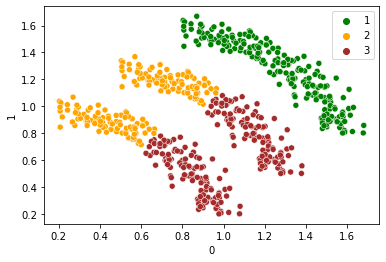

In [ ]:
# Aglomerative 2 - case 4
# Code which output time, purity, distinguishable plot 
#conclusive line
data=data4
n_clust=3
# Dendrogram = dendrogram((linkage(data, method ='average')))
# plt.axhline(y=2.0, c='grey', lw=1, linestyle='dashed');
t0=time.time()
distance_matrix = linkage(data[[0,1]], method='average', metric='euclidean')
temp = fcluster(distance_matrix, n_clust, criterion='maxclust')
sns.scatterplot(x=0, y=1, hue=temp, data=data,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4fs" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("Average Agglomerative clustering can be a good technique for this data as purity is medium.")

The time of plot is 0.2324s
The purity score is 0.6557
Average Agglomerative clustering can be a good technique for this data as purity is medium.


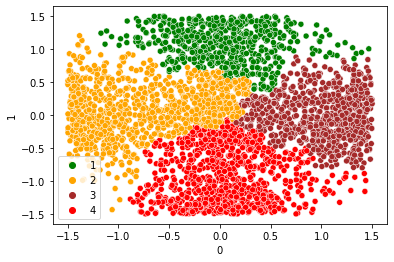

In [ ]:
# Aglomerative 2 - case 5
# Code which output time, purity, distinguishable plot 
#conclusive line
data=data5
n_clust=4
# Dendrogram = dendrogram((linkage(data, method ='single')))
# plt.axhline(y=1.3, c='grey', lw=1, linestyle='dashed');
t0=time.time()
distance_matrix = linkage(data[[0,1]], method='average', metric='euclidean')
temp = fcluster(distance_matrix, n_clust, criterion='maxclust')
sns.scatterplot(x=0, y=1, hue=temp, data=data,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4fs" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("Average Agglomerative clustering can be a good technique for this data as purity is medium.")

The time of plot is 0.0791s
The purity score is 0.7215
Complete Agglomerative clustering can be a good technique for this data as purity is good.


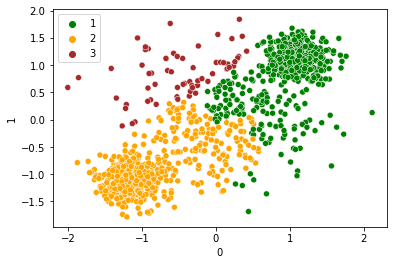

In [ ]:
# Aglomerative 3 - case 1
# Code which output time, purity, distinguishable plot 
#conclusive line
data=data1
n_clust=3
# Dendrogram = dendrogram((linkage(data, method ='complete')))
# plt.axhline(y=4, c='grey', lw=1, linestyle='dashed');
t0=time.time()
distance_matrix = linkage(data[[0,1]], method='complete', metric='euclidean')
temp = fcluster(distance_matrix, n_clust, criterion='maxclust')
sns.scatterplot(x=0, y=1, hue=temp, data=data,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4fs" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("Complete Agglomerative clustering can be a good technique for this data as purity is good.")

The time of plot is 0.0748s
The purity score is 0.8580
Complete Agglomerative clustering is a good technique for this data as purity is relatively high.


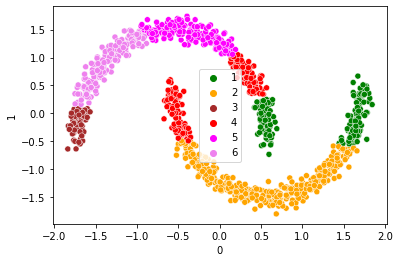

In [ ]:
# Aglomerative 3 - case 2
# Code whihc ourput time, purity, distinguishable plot 
#conclusive line
data=data2
n_clust=6
# Dendrogram = shc.dendrogram((shc.linkage(data, method ='complete')))
# plt.axhline(y=3.4, c='grey', lw=1, linestyle='dashed');
t0=time.time()
distance_matrix = linkage(data[[0,1]], method='complete', metric='euclidean')
temp = fcluster(distance_matrix, n_clust, criterion='maxclust')
sns.scatterplot(x=0, y=1, hue=temp, data=data,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4fs" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("Complete Agglomerative clustering is a good technique for this data as purity is relatively high.")

The time of plot is 0.0695s
The purity score is 0.4996
Complete Agglomerative clustering is not a good technique for this data as purity is relatively medium-low.


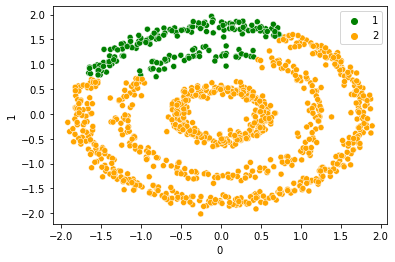

In [ ]:
# Aglomerative 3 - case 3
# Code which output time, purity, distinguishable plot 
#conclusive line
data=data3
n_clust=2
# Dendrogram = shc.dendrogram((shc.linkage(data3, method ='complete')))
# plt.axhline(y=2.0, c='grey', lw=1, linestyle='dashed');
t0=time.time()
distance_matrix = linkage(data[[0,1]], method='complete', metric='euclidean')
temp = fcluster(distance_matrix, n_clust, criterion='maxclust')
sns.scatterplot(x=0, y=1, hue=temp, data=data,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4fs" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("Complete Agglomerative clustering is not a good technique for this data as purity is relatively medium-low.")

The time of plot is 0.0557s
The purity score is 0.6667
Complete Agglomerative clustering can be a good technique for this data as purity is medium-high.


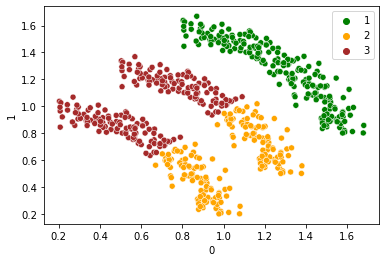

In [ ]:
# Aglomerative 3 - case 4
# Code which output time, purity, distinguishable plot 
#conclusive line
data=data4
n_clust=3
# Dendrogram = dendrogram((linkage(data, method ='complete')))
# plt.axhline(y=3.1, c='grey', lw=1, linestyle='dashed');
t0=time.time()
distance_matrix = linkage(data[[0,1]], method='complete', metric='euclidean')
temp = fcluster(distance_matrix, n_clust, criterion='maxclust')
sns.scatterplot(x=0, y=1, hue=temp, data=data,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4fs" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("Complete Agglomerative clustering can be a good technique for this data as purity is medium-high.")

The time of plot is 0.2129s
The purity score is 0.6230
Complete Agglomerative clustering can be a good technique for this data as purity is medium-high.


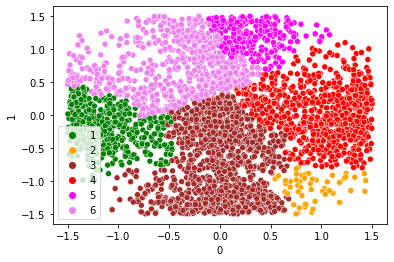

In [ ]:
# Aglomerative 3 - case 5
# Code which output time, purity, distinguishable plot 
#conclusive line
data=data5
n_clust=6
# Dendrogram = dendrogram((linkage(data, method ='single')))
# plt.axhline(y=1.3, c='grey', lw=1, linestyle='dashed');
t0=time.time()
distance_matrix = linkage(data[[0,1]], method='complete', metric='euclidean')
temp = fcluster(distance_matrix, n_clust, criterion='maxclust')
sns.scatterplot(x=0, y=1, hue=temp, data=data,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4fs" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("Complete Agglomerative clustering can be a good technique for this data as purity is medium-high.")

Number of clusters is: 4
The time of plot is 0.0622s
The purity score is 1.0000
DBSCAN is a very good technique for this data as purity is perfect.


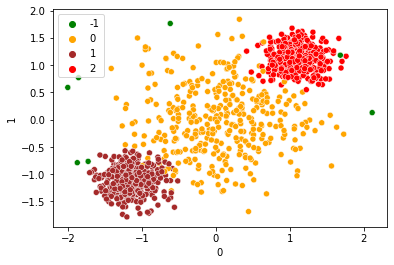

In [ ]:
# Dbscan - case 1
# Code which output time, purity, distinguishable plot
#conclusive line
data=data1
t0=time.time()
dbscan=DBSCAN(eps=0.5)
dbscan.fit(data)
temp=dbscan.labels_
n_clust=max(temp)-min(temp)+1
print(f"Number of clusters is: {n_clust}")
sns.scatterplot(x=0, y=1, hue=dbscan.labels_, data=data,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4fs" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("DBSCAN is a very good technique for this data as purity is perfect.")

Number of clusters is: 2
The time of plot is 0.0603s
The purity score is 1.0000
DBSCAN is a very good technique for this data as purity is perfect.


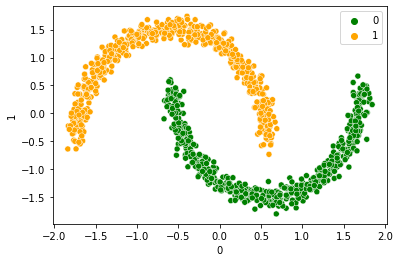

In [ ]:
# Dbscan - case 2
# Code which output time, purity, distinguishable plot
#conclusive line
data=data2
t0=time.time()
dbscan=DBSCAN(eps=0.5)
dbscan.fit(data)
temp=dbscan.labels_
n_clust=max(temp)-min(temp)+1
print(f"Number of clusters is: {n_clust}")
sns.scatterplot(x=0, y=1, hue=dbscan.labels_, data=data,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4fs" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("DBSCAN is a very good technique for this data as purity is perfect.")

Number of clusters is: 3
The time of plot is 0.0614s
The purity score is 1.0000
DBSCAN is a very good technique for this data as purity is perfect.


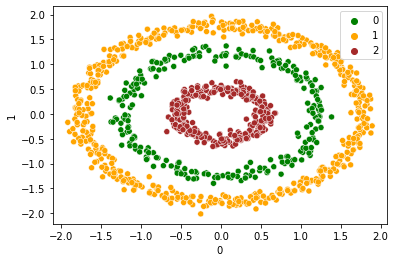

In [ ]:
# Dbscan - case 3
# Code which output time, purity, distinguishable plot
#conclusive line
data=data3
t0=time.time()
dbscan=DBSCAN(eps=0.5)
dbscan.fit(data)
temp=dbscan.labels_
n_clust=max(temp)-min(temp)+1
print(f"Number of clusters is: {n_clust}")
sns.scatterplot(x=0, y=1, hue=dbscan.labels_, data=data,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4fs" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("DBSCAN is a very good technique for this data as purity is perfect.")

Number of clusters is: 3
The time of plot is 0.0538s
The purity score is 1.0000
DBSCAN is a very good technique for this data as purity is perfect.


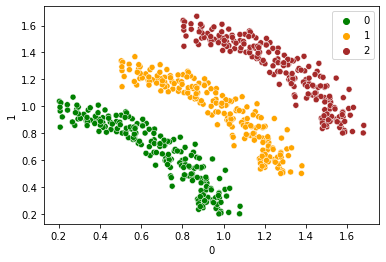

In [ ]:
# Dbscan - case 4
# Code which output time, purity, distinguishable plot 
#conclusive line
data=data4
t0=time.time()
dbscan=DBSCAN(eps=0.5)
dbscan.fit(data)
temp=dbscan.labels_
n_clust=max(temp)-min(temp)+1
print(f"Number of clusters is: {n_clust}")
sns.scatterplot(x=0, y=1, hue=dbscan.labels_, data=data,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4fs" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("DBSCAN is a very good technique for this data as purity is perfect.")

Number of clusters is: 5
The time of plot is 0.2215s
The purity score is 1.0000
DBSCAN is a very good technique for this data as purity is perfect.


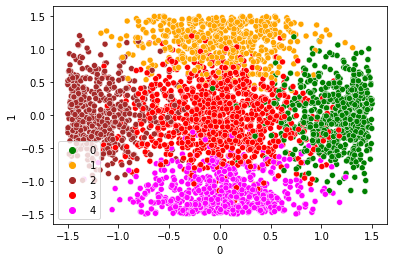

In [ ]:
# Dbscan - case 4
# Code which output time, purity, distinguishable plot 
#conclusive line
data=data5
t0=time.time()
dbscan=DBSCAN(eps=0.5)
dbscan.fit(data)
temp=dbscan.labels_
n_clust=max(temp)-min(temp)+1
print(f"Number of clusters is: {n_clust}")
sns.scatterplot(x=0, y=1, hue=temp, data=data,palette=col[:n_clust]);
t1=time.time()
print("The time of plot is %.4fs" % (t1 - t0))
print("The purity score is %.4f" % (purity_score(data[2],temp)))
print("DBSCAN is a very good technique for this data as purity is perfect.")

In [ ]:
print("DBSCAN is a very good technique for all of the giveen data as it forms optimal clusters with perfect purity on all different variations of given data.")

DBSCAN is a very good technique for all of the giveen data as it forms optimal clusters with perfect purity on all different variations of given data.


In [ ]:
# Happy Ramazan :)